In [1]:
import csv
import os

import numpy as np
import scipy.stats
import sklearn.decomposition
from matplotlib import pyplot as plt
from PIL import Image

![alt text](L2.png "Title")

In [2]:
RGB = ["r", "g", "b"]
fieldnames = [
    "r_mean", "g_mean", "b_mean",
    "r_var", "g_var", "b_var",
    "r_skewness", "g_skewness", "b_skewness",
    "r_kurtosis", "g_kurtosis", "b_kurtosis"
]
DECIMALS = 4
COMPONENTS = [8, 32, 64, 128, 256]

def metric_mse(C, S):
    return round(float(np.power(C - S, 2).sum()) / float((C.shape[0] * C.shape[1])), DECIMALS)

def pca_perform(image, components):
    pca = sklearn.decomposition.PCA(components, svd_solver="full")
    image_pca =pca.fit_transform(image)
    pca_image_inverse = pca.inverse_transform(image_pca)
    return pca_image_inverse.astype("int")

In [3]:
class Img(object):
    
    def __init__(self, array):
        self.img = array
    
    @property
    def im_mean(self):
        return [round(np.mean(self.img[:, :, ch]), DECIMALS) for ch in range(self.img.shape[-1])]

    @property
    def im_var(self):
        return [round(np.var(self.img[:, :, ch]), DECIMALS) for ch in range(self.img.shape[-1])]
    
    @property
    def im_skewness(self):
        return [round(scipy.stats.skew(self.img[:, :, ch], axis=None), DECIMALS) for ch in range(self.img.shape[-1])]
    
    @property
    def im_kurtosis(self):
        return [round(scipy.stats.kurtosis(self.img[:, :, ch], axis=None), DECIMALS) for ch in range(self.img.shape[-1])]
        

In [5]:
image_dir = "../Img/"
filename = "im24785.jpg"
image = np.array(Image.open(f"{image_dir}{filename}"))
image.shape

(360, 480, 3)

In [6]:
img = Img(image)


def get_vectors(img):
    result = dict()
    for prop in dir(img):
        
        if prop.startswith("im_"):
            r_res, g_res, b_res = getattr(img, prop)
            result.update({f"{prop[3:]}_r": r_res, f"{prop[3:]}_g": g_res, f"{prop[3:]}_b": b_res})
    return result

get_vectors(img)

{'kurtosis_r': 3.0422,
 'kurtosis_g': -0.4685,
 'kurtosis_b': -1.0862,
 'mean_r': 63.0841,
 'mean_g': 77.5875,
 'mean_b': 94.9318,
 'skewness_r': 1.4295,
 'skewness_g': 0.3975,
 'skewness_b': 0.2982,
 'var_r': 1809.6059,
 'var_g': 1909.9637,
 'var_b': 3000.6493}

### 3. Form Vectors from Image statistical moments

In [7]:
VECTOR_4 = [[],[],[],[],[],[],[],[],[],[],[],[]]


files = os.listdir(f"{image_dir}")
for i in range(len(files)):
    image = files[i]
    result = dict()
#     print(f"Image: {image}")
    img = Img(np.array(Image.open(f"{image_dir}{image}")))
    properties = get_vectors(img)
#     print(properties)

    VECTOR_4[0].append(properties["mean_r"])
    VECTOR_4[1].append(properties["mean_g"])
    VECTOR_4[2].append(properties["mean_b"])

    VECTOR_4[3].append(properties["var_r"])
    VECTOR_4[4].append(properties["var_g"])
    VECTOR_4[5].append(properties["var_b"])

    VECTOR_4[6].append(properties["skewness_r"])
    VECTOR_4[7].append(properties["skewness_g"])
    VECTOR_4[8].append(properties["skewness_b"])
    
    VECTOR_4[9].append(properties["kurtosis_r"])
    VECTOR_4[10].append(properties["kurtosis_g"])
    VECTOR_4[11].append(properties["kurtosis_b"])

ARRAY_4 = np.array(VECTOR_4)
del VECTOR_4
    
print(ARRAY_4)

[[ 6.30841000e+01  6.88150000e+01  1.20933200e+02  1.23863900e+02]
 [ 7.75875000e+01  8.87997000e+01  9.77657000e+01  1.00457900e+02]
 [ 9.49318000e+01  6.18694000e+01  6.21436000e+01  7.46315000e+01]
 [ 1.80960590e+03  4.43225830e+03  8.72457330e+03  1.04942537e+04]
 [ 1.90996370e+03  4.73153200e+03  6.88973040e+03  8.89679070e+03]
 [ 3.00064930e+03  4.77884300e+03  3.27759100e+03  7.18060140e+03]
 [ 1.42950000e+00  1.24960000e+00  3.05200000e-01 -3.09000000e-02]
 [ 3.97500000e-01  8.19600000e-01  4.45300000e-01  3.27300000e-01]
 [ 2.98200000e-01  1.40590000e+00  7.13000000e-01  8.23700000e-01]
 [ 3.04220000e+00  7.35700000e-01 -1.61480000e+00 -1.65710000e+00]
 [-4.68500000e-01 -2.54900000e-01 -1.49690000e+00 -1.41740000e+00]
 [-1.08620000e+00  1.00930000e+00 -1.21550000e+00 -6.98200000e-01]]


### 4. Form Models from Vectors

In [9]:
np.set_printoptions(suppress=True)

print(f"Vector 1 mean={np.round(np.mean(ARRAY_4[0:3], axis=1), 4)} cov=\n{np.cov(ARRAY_4[0:3])}\n")

print(f"Vector 2 mean={np.round(np.mean(ARRAY_4[0:6], axis=1), 4)} cov={np.cov(ARRAY_4[0:6]).shape} (shape)")

print(f"Vector 3 mean={np.round(np.mean(ARRAY_4[0:9], axis=1), 4)} cov={np.cov(ARRAY_4[0:9]).shape} (shape)")

print(f"Vector 4 mean={np.round(np.mean(ARRAY_4[0:12], axis=1), 4)} cov={np.cov(ARRAY_4[0:12])} (shape)")

Vector 1 mean=[94.174  91.1527 73.3941] cov=
[[1069.06856988  311.54649519 -213.88872309]
 [ 311.54649519  106.62325869 -109.31029699]
 [-213.88872309 -109.31029699  241.59871346]]

Vector 2 mean=[  94.174    91.1527   73.3941 6365.1728 5607.0042 4559.4212] cov=(6, 6) (shape)
Vector 3 mean=[  94.174    91.1527   73.3941 6365.1728 5607.0042 4559.4212    0.7384
    0.4974    0.8102] cov=(9, 9) (shape)
Vector 4 mean=[  94.174    91.1527   73.3941 6365.1728 5607.0042 4559.4212    0.7384
    0.4974    0.8102    0.1265   -0.9094   -0.4976] cov=[[    1069.06856988      311.54649519     -213.88872309   125458.85568077
     89713.29269938    28806.52413325      -22.96075873       -3.83639837
        -0.46283603      -68.54940828      -20.36950054      -15.02672852]
 [     311.54649519      106.62325869     -109.31029699    40123.32100919
     30435.2898592     12180.87198897       -6.86700176       -0.44344165
         1.6755123       -23.03249095       -5.37770476       -0.72511827]
 [    -213

### 5.1 Image color chanels decomposition

In [10]:
def pca_decomposition_mes(image):
    res = []
    max_components = min(image.shape)
    for c in COMPONENTS:
        image_pca = pca_perform(image, c)
        mse = metric_mse(image, image_pca)
        res.append(mse)
    image_pca = pca_perform(image, max_components)
    mse = metric_mse(image, image_pca)
    res.append(mse)
#     print(f"RES: {res}")
    return res

In [11]:
image = np.array(Image.open(f"{image_dir}{filename}"))
res = pca_decomposition_mes(image[:, :, 0])
print(res)

[102.5002, 17.6514, 5.0381, 1.0732, 0.4987, 0.5332]


In [12]:
R = [[], [], [], [], [], []]
G = [[], [], [], [], [], []]
B = [[], [], [], [], [], []]
files = os.listdir(f"{image_dir}")
for i in range(len(files)):
    img = files[i]
    image = np.array(Image.open(f"{image_dir}{img}"))
    res = pca_decomposition_mes(image[:, :, 0])
    for r in range(len(res)):
        R[r].append(res[r])

    res = pca_decomposition_mes(image[:, :, 1])
    for r in range(len(res)):
        G[r].append(res[r])

    res = pca_decomposition_mes(image[:, :, 2])
    for r in range(len(res)):
        B[r].append(res[r])

# print("R")        
print(R)
# print("\nG")
# print(G)
# print("\nB")
# print(B)

[[102.5002, 1644.5815, 238.5356, 1215.5043], [17.6514, 930.5117, 44.7636, 553.4712], [5.0381, 570.909, 11.9306, 297.9172], [1.0732, 237.47, 2.3872, 102.5144], [0.4987, 27.3251, 0.5738, 5.7287], [0.5332, 0.4624, 0.4876, 0.4104]]


### 5.2 Plot

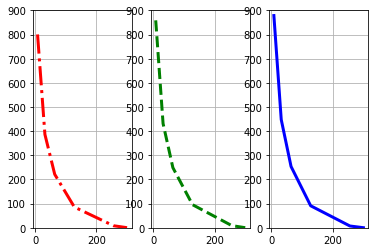

In [14]:
figure = plt.subplot()


for i in zip([R, G, B], ["r-.", "g--", "b"], [1, 2, 3]):
    plt.subplot(f"13{i[2]}")
    arr = np.array(i[0])
    i[1]
    plt.plot([*COMPONENTS, 300], np.mean(arr, axis=1), i[1], lw=3.0)
    plt.grid()
    plt.ylim((0, 900))


#     plt.plot(i)
plt.savefig("l2res.png")
plt.show()

### 6.1 Make explicit Markov matrix of 1 and 2 order

In [18]:
image = np.array(Image.open(f"{image_dir}{filename}"))
image.shape

(360, 480, 3)

In [19]:
np.warnings.filterwarnings('ignore')
shape = (256, 256)
R = np.zeros(shape)
G = np.zeros(shape)
B = np.zeros(shape)
c = 0
for i in image:
    previous = i[0]
    for j in range(1,len(i)):
        R[previous[0]][i[j][0]] += 1
        G[previous[1]][i[j][1]] += 1
        B[previous[2]][i[j][2]] += 1

for vi in enumerate((R, G, B)):
    i = vi[0]
    v = vi[1]
    
    row_sums = v.sum(axis=1)
    assert int(np.sum(row_sums)) == image.shape[0] * (image.shape[1] - 1)
    matrix_normalized = v / row_sums[:, np.newaxis]
    np.nan_to_num(matrix_normalized, False)
    np.savetxt(f"markov_{('R', 'G', 'B')[i]}_1.txt", matrix_normalized, fmt="%.5f", delimiter="\t")
    matrix_norm_2 = np.dot(matrix_normalized, matrix_normalized)
    np.savetxt(f"markov_{('R', 'G', 'B')[i]}_2.txt", matrix_norm_2, fmt="%.5f", delimiter="\t")

In [20]:
a = 0
print(matrix_normalized)
for i in range(len(matrix_normalized)):
    for j in range(len(matrix_normalized[i])):
        if i == j:
            print(f"{a}: {matrix_normalized[i][j]}")
            a += 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0: 0.0
1: 0.0
2: 0.0
3: 0.0
4: 0.0
5: 0.0
6: 0.0
7: 0.0
8: 0.0
9: 0.0
10: 0.0
11: 0.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.0
18: 0.0
19: 0.0
20: 0.0
21: 0.0
22: 0.0
23: 0.0
24: 0.0
25: 0.0
26: 0.0
27: 0.0
28: 0.0
29: 0.0
30: 0.0
31: 0.0
32: 0.0
33: 0.0
34: 0.0
35: 0.0
36: 0.0
37: 0.0
38: 0.008350730688935281
39: 0.0
40: 0.0
41: 0.0
42: 0.0
43: 0.0
44: 0.0
45: 0.010438413361169102
46: 0.0
47: 0.0
48: 0.005219206680584551
49: 0.006263048016701462
50: 0.007654836464857342
51: 0.014613778705636743
52: 0.024217118997912318
53: 0.008872651356993737
54: 0.016701461377870562
55: 0.013361169102296452
56: 0.015657620041753653
57: 0.012990025516121549
58: 0.013361169102296452
59: 0.015031315240083507
60: 0.011482254697286013
61: 0.009603340292275574
62: 0.009046624913013222
63: 0.010438413361169102
64: 0.013569937369519834
65: 0.02087

In [21]:
matrix_norm_5 = np.dot(np.dot(np.dot(np.dot(matrix_normalized, matrix_normalized), matrix_normalized), matrix_normalized), matrix_normalized)

In [23]:
a = 0
mn = np.zeros((1, 256))
print(matrix_norm_5)
for i in range(len(matrix_norm_5)):
    for j in range(len(matrix_norm_5[i])):
        if i == j:
#             mn[1][a] = 
            print(f"{np.round(matrix_norm_5[i][j], 5)}")
            a += 1

np.savetxt("diag5.txt", matrix_norm_5,   fmt="%.5f", delimiter="\t")            
np.savetxt("matrix5.txt", matrix_norm_5,   fmt="%.5f", delimiter="\t")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.00155
0.0
0.0
0.0
0.0
0.0
0.0
0.00095
0.0
0.0
0.00074
0.00066
0.00061
0.00071
0.00061
0.00048
0.00063
0.0005
0.0005
0.00045
0.00049
0.00035
0.00031
0.00033
0.0003
0.00034
0.00041
0.00031
0.0
0.0
0.00027
0.0
0.00029
0.0
0.0
0.00015
0.0
0.0
0.0
0.00018
0.0
0.0
0.0
0.0
0.0
0.00027
0.0
0.0
0.0
0.0
0.0005
0.00051
0.00051
0.0004
0.00052
0.00051
0.00045
0.00045
0.00051
0.00055
0.0004
0.0006
0.00072
0.00072
0.00067
0.00065
0.00068
0.00077
0.00098
0.00104
0.00107
0.0
0.0
0.00123
0.00149
0.00158
0.00114
0.00064
0.0
0.00126
0.00106
0.00072
0.00058
0.00064
0.00048
0.00048
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2e-05
0.0
0.0
0.0
0.0
2e-05
2e-05
0.0
2e-05
3e-05
2e-05
2e-05
3